<a href="https://colab.research.google.com/github/MegaBeing/MachineLearningJourneys/blob/main/01_Neural_network_regression_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to Regression with Neural Network with TensorFlow 🦞

Just Regression (you know what it is)

In [ ]:
# import TensorFlow
import tensorflow as tf
tf.__version__

In [ ]:
# creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.array([-1.,-17.,7.,-8.,9.,-11.,-3.,5.])
y = np.array([9.,-7.,17.,2.,19.,-1.,7.,15.])
plt.figure(figsize = (10,10))
plt.scatter(X,y);

In [ ]:
y == X+10

# input and output shapes


In [ ]:
# create
!nvidia-smi

In [ ]:
X[0].shape

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape

In [ ]:
plt.scatter(X,y)

# TensorFlow Workflow!!!
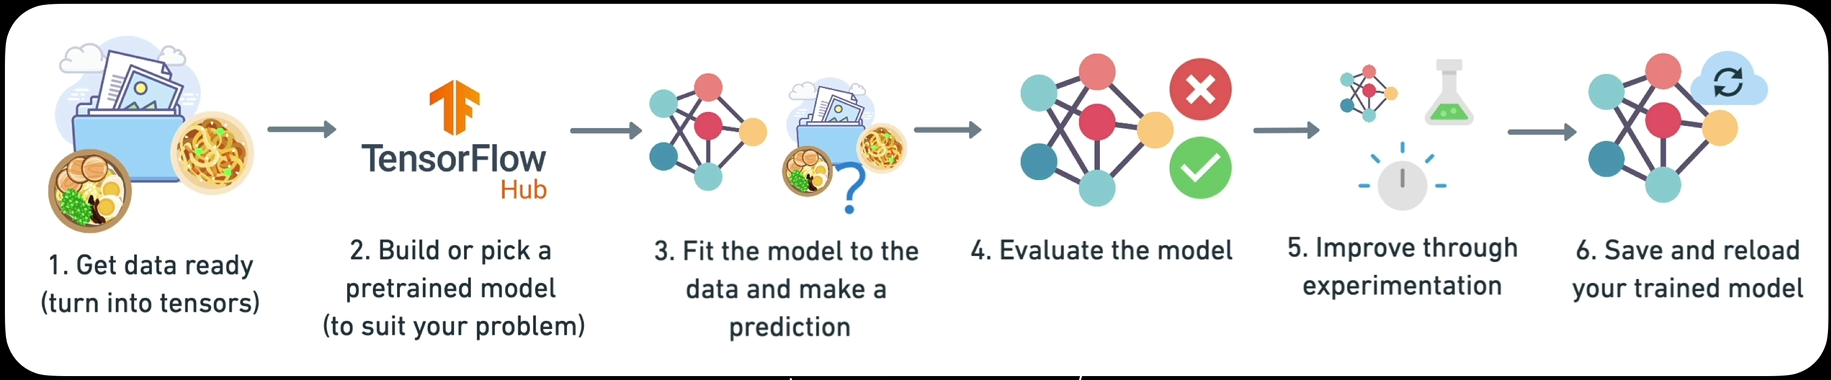

# Steps in modelling with TensorFlow
1. `Creating a Model`: 
  * **Defines**:
    * Inner Layers
    * Outter Layers
    * Hidden Layers
2. `Compiling a Model`:
  * **Defines**:
    * Loss Function
    * Optimizer
    * Evaluation Matrix
3. `Fitting a Model`: Lets the Model Try to find patterns between **Features** and **Labels**

In [ ]:
# set_seed
tf.random.set_seed(42)
# create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# fit the model
model.fit(tf.expand_dims(X,axis = -1),y,epochs = 5)

In [ ]:
y_pred = model.predict([17.0])
y_pred

very inaccurate model 
# Let's try and improve our model
we can improve our model, by altering the steps we took to create the model
1. `Create a model`: here we might add more layers, increase the number of neurons within the hidden layers, change the activation functions of each layer
2. `Compiling a model`: here we might change the **learning rate** of the optimizer function
3. `Fitting a model`: here we can increase the number of **epochs**
or add more data

In [ ]:
# let's improve
tf.random.set_seed(42)
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# complie a model
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics=['mae'])

# fit the model

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [ ]:
# let's check
y_pred = model.predict([27.0])
y_pred

There is more room for improvement

In [ ]:
# create a model with an extra hidden layer
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1)
])
# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ['mae'])
# fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [ ]:
X,y

In [ ]:
y_pred = model.predict([12])
y_pred

In [ ]:
# let's try without 'relu' activation and changing our optimizer function
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# compile a model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mae,
              metrics = ['mae'])
# fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [ ]:
y_pred = model.predict([12.])
y_pred

In [ ]:
# let's change the optimizer function parameters
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.keras.losses.mae,
              metrics = ['mae'])
# fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [ ]:
y_pred=model.predict([12.])
y_pred

# Evaluate our model
## The best you can do is:
```
create a model -> compile a model -> fit a model -> evaluate it -> Repeat the process
```

During evaluation only thing you can do is :  
▶`Visualize`
> * **The Data**: What data are we working with? What does it look like?
* **The model itself**: What does our model look like?
* **Training our model**: How does our model performs while it learns?
* **The predictions of our Model**: How the prediction of our model lines up with the ground truth.


In [ ]:
# Make a Bigger Dataset
X = tf.range(-100,100,4)
X

In [ ]:
y = tf.range(-90,110,4)
y

In [ ]:
y == X+10

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X,y)

In [ ]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

In [ ]:
len(X_train),len(X_test)

In [ ]:
len(y_train),len(y_test)

In [ ]:
plt.figure(figsize=(10,10))
# plot 1 - training data
plt.scatter(X_train,y_train,c='#6937ad',label='training data')
# plot 2 - testing data
plt.scatter(X_test,y_test,c='#f79448',label='testing data')
# labels
plt.legend();

In [ ]:
# Let's create a NN
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])
# compile a model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss=tf.keras.losses.mae,
              metrics=['mae'])
# # fit a model
# model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

# Visualize our model

In [ ]:
model.summary()

In [ ]:
# let's create a model using input_shape parameter in Dense()
tf.random.set_seed(42)
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# compile a model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

In [ ]:
model.summary()

In [ ]:
# # fit a model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

In [ ]:
from tensorflow.python.eager.monitoring import Metric
# some more twicks

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
],name='model_1')

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

# fit a model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [ ]:
model.summary()

In [ ]:
plot_model(model=model,show_shapes=True)

In [ ]:
y_pred=model.predict(X_test)

# visualize the model's prediction

In [ ]:
X

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
def plot_pred(X_train,y_train,X_test,y_test,y_pred):
  plt.figure(figsize=(10,10))
  # plot training data
  plt.scatter(X_train,y_train,c='#f79448',label='Training Data')
  # plot testing data
  plt.scatter(X_test,y_test,c='#f7d04f',label='Test Data')
  # plot predicted data
  plt.scatter(X_test,y_pred,c='k',marker='.',label='Model Predictions')
  # labels
  plt.legend();
plot_pred(X_train,y_train,X_test,y_test,y_pred)

# Model predictions using regression evaluation metrics
Most used:
> * `MAE`: Mean Absolute Error
* `MSE`: Mean Squared Error

In [ ]:
# evaluate()
model.evaluate(X_test,y_test)

In [ ]:
# MAE

tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

In [ ]:
# MSE

tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred)) # needed to use squeeze as our y_pred had an extra dim

# Experiments to improve our model
1. model_1: same as original model
2. model_2: 2 layers with 100 epochs
3. model_3: 1 layer with 500 epochs
4. model_4: 2 layers with 500 epochs

# Model_1

In [ ]:
# random seed
tf.random.set_seed(42)

# create a model
model1= tf.keras.Sequential([
    tf.keras.layers.Dense(1,name='Input_layer')
])

# compile the model
model1.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics=['mae'])
# fit a model
model1.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [ ]:
model1.summary()

In [ ]:
plot_model(model=model1)

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
plot_pred(X_train,y_train,X_test,y_test,y_pred)

# Model_2

In [ ]:
# random seed 
tf.random.set_seed(42)

#create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(30,activation='relu')
])

# complile a model 
model2.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics=['mae'])

# fit a model 
model2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

In [ ]:
model2.summary()

In [ ]:
plot_model(model=model2)

In [ ]:
model.evaluate(X_test,y_test)


In [ ]:
plot_pred(X_train,y_train,X_test,y_test,y_pred)

# Model_3

In [ ]:
# random seed 
tf.random.set_seed(42)

# create a model
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# compile a model
model3.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

# fit a model
model3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

In [ ]:
model3.evaluate(X_test,y_test)

In [ ]:
plot_model(model=model3)

In [ ]:
plot_pred(X_train,y_train,X_test,y_test,y_pred)

# Model_4

In [ ]:
# random seed 
tf.random.set_seed(42)

# create a model
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(30,activation='relu')
])

# compile a model
model4.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

# fit a model
model4.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

In [ ]:
model4.evaluate(X_test,y_test)

In [ ]:
plot_model(model=model4)

In [ ]:
plot_pred(X_train,y_train,X_test,y_test,y_pred)

# Tracking our experiments
* It is really tedious task to track all your machine learning results
* *📗Resource*: you can look via using these:-
  * __tensorBoard__- a component of tensorflow library which helps us track different modelling experiments
  * __weights & Biases__- a tool to track all kinds of machine learning experiments and also plugs straight into TensorBoard

# save our model
saving our model can help us use it on different platforms  
There are two main model format:
* The SaveModel Format
* THe HDF5 Format

In [ ]:
 model.save("best-available_model")

In [ ]:
# hdf5 standard
model.save("best_available_model.h5")

In [ ]:
# loading in the save model
loaded = tf.keras.models.load_model('best-available_model')
plot_model(model=loaded)

In [ ]:
loaded.summary()

In [ ]:
model.summary()

In [ ]:
tf.squeeze(model.predict(X_test))== tf.squeeze(loaded.predict(X_test))

The steps are same for both the formats

# A Larger Dataset

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
data.head()

In [ ]:
data.isna().sum()

In [ ]:
data_one_hot=pd.get_dummies(data)
data_one_hot

In [ ]:
data_one_hot.columns

In [ ]:
X=data_one_hot.drop('charges',axis=1)
y=data_one_hot.charges

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(12),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
# compile a model 
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae'])
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

In [ ]:
model.predict(X_test)

In [ ]:
# creating another model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# fit a model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

In [ ]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
 
# compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# fit a model
history=model.fit(X_train,y_train,epochs=200)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss');

#### Early stopping callback
this function of tf is used for basically stopping the training epochs when it doesn't see any significant change in some consecutive epochs.  
[TF early-stopping-callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

### Normalization and Standardization

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
data.head()

In [ ]:
new_data=pd.get_dummies(data)
new_data

In [ ]:
X=new_data.drop('charges',axis=1)
y=new_data['charges']

In [ ]:
from sklearn.preprocessing import normalize
nor = pd.DataFrame(normalize(X),columns=X.columns)
nor

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(nor,y,test_size=0.2)

In [ ]:
#creating a model
m1 = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compiling a model
m1.compile(loss=tf.keras.losses.mae,
           optimizer=tf.keras.optimizers.Adam(),
           metrics=['mae'])
# fit a model
m1.fit(x_train,y_train,epochs=200)

In [ ]:
data.info()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = data.drop("charges", axis=1)
y = data["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

In [ ]:
X_train_normal[0].shape

In [ ]:
# creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(11,activation='relu'),
    tf.keras.layers.Dense(40,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu')
])

# compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit a model
history=model.fit(X_train_normal,y_train,epochs=200)

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss');